<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


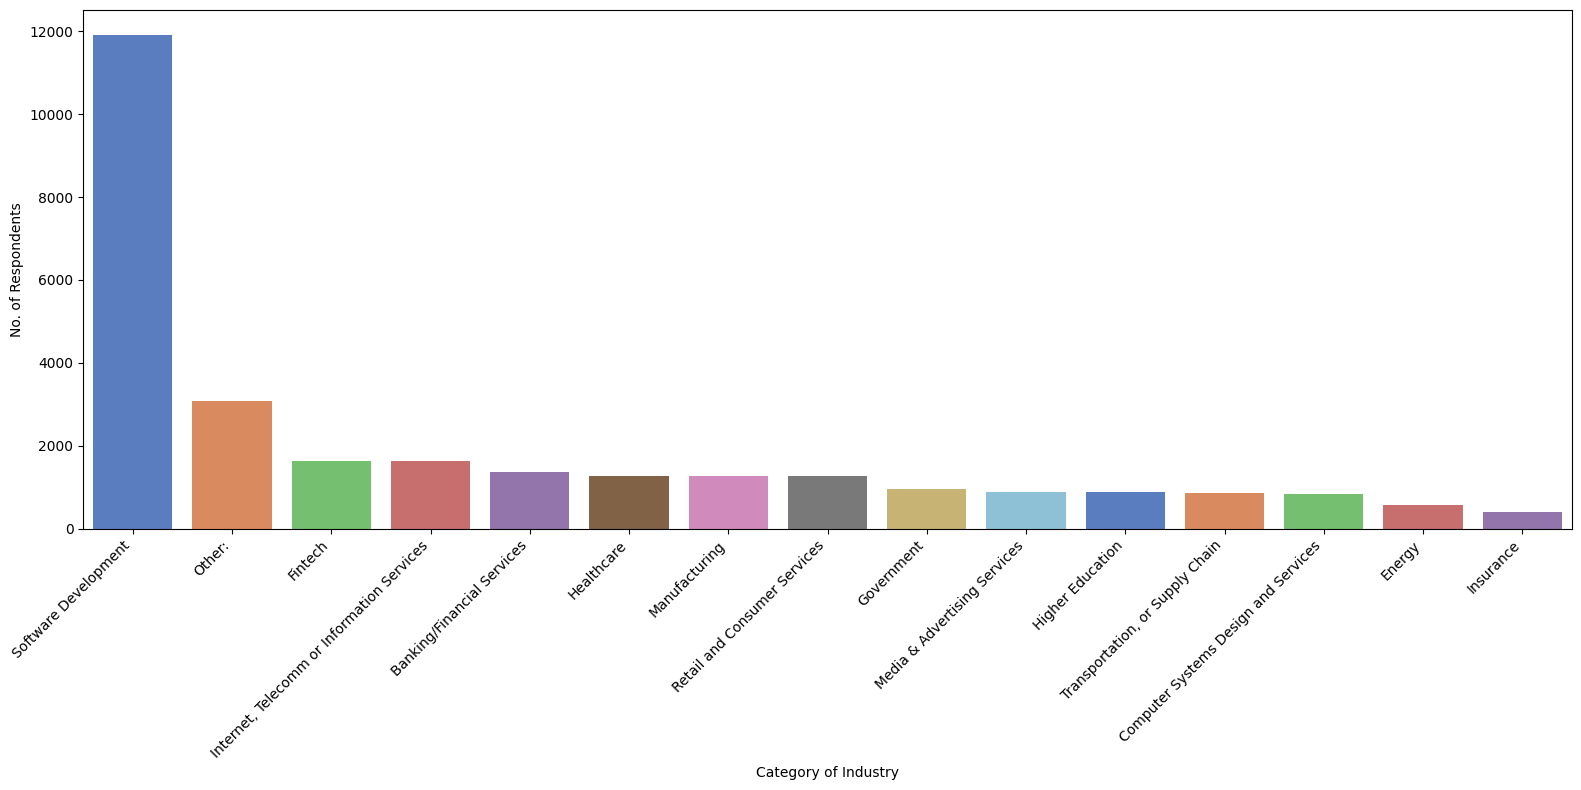

In [3]:
##Write your code here
plt.figure(figsize=(16, 8))
industry_counts = df['Industry'].value_counts()
sns.barplot(x=industry_counts.index, y=industry_counts.values, hue=industry_counts.index, palette="muted", legend=False)
plt.xlabel('Category of Industry')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean Comp.: {mean_comp}")
print(f"Median Comp.: {median_comp}")
print(f"Std of Comp.: {std_comp}")

outlier = mean_comp + (3 * std_comp)
hicomp_outliers = df[df['ConvertedCompYearly'] > outlier]

print(f"\nNo. of high comp. outliers (>{outlier}): {len(hicomp_outliers)}")
print("\nHigh Compensation Outliers:")
print(hicomp_outliers[['ResponseId', 'ConvertedCompYearly', 'Country']])

Mean Comp.: 86155.28726264134
Median Comp.: 65000.0
Std of Comp.: 186756.97308629757

No. of high comp. outliers (>646426.2065215341): 89

High Compensation Outliers:
       ResponseId  ConvertedCompYearly                   Country
529           530             650000.0  United States of America
828           829            1000000.0  United States of America
1932         1933             945000.0  United States of America
2171         2172             750000.0  United States of America
2187         2188            2000000.0                     Gabon
...           ...                  ...                       ...
38219       38220            1000000.0                    Poland
39643       39644            1300000.0  United States of America
40066       40067             800000.0  United States of America
40952       40953             750000.0  United States of America
41027       41028             700000.0  United States of America

[89 rows x 3 columns]


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers: 978
Lower Bound: -80177.25
Upper Bound: 220860.75


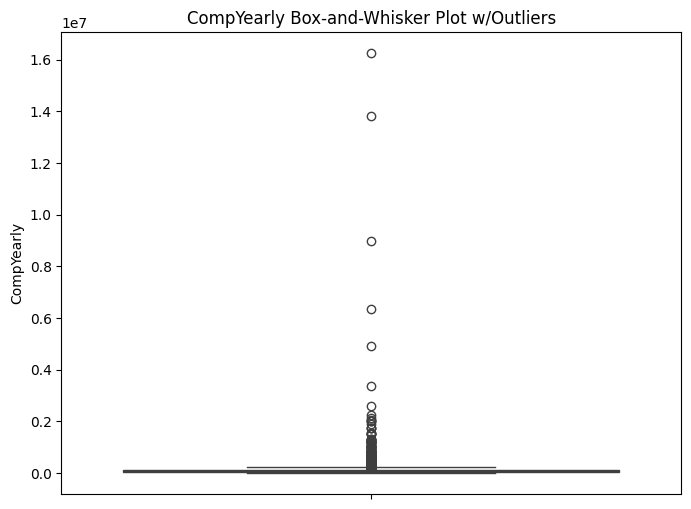

In [6]:
##Write your code here
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

num_outliers = len(outliers)
print(f"Number of outliers: {num_outliers}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

plt.figure(figsize=(8, 6))
sns.boxplot(y='ConvertedCompYearly', data=df)
plt.title('CompYearly Box-and-Whisker Plot w/Outliers')
plt.ylabel('CompYearly')

plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


Original DataFrame size: 23435
DataFrame size after removing outliers: 22457


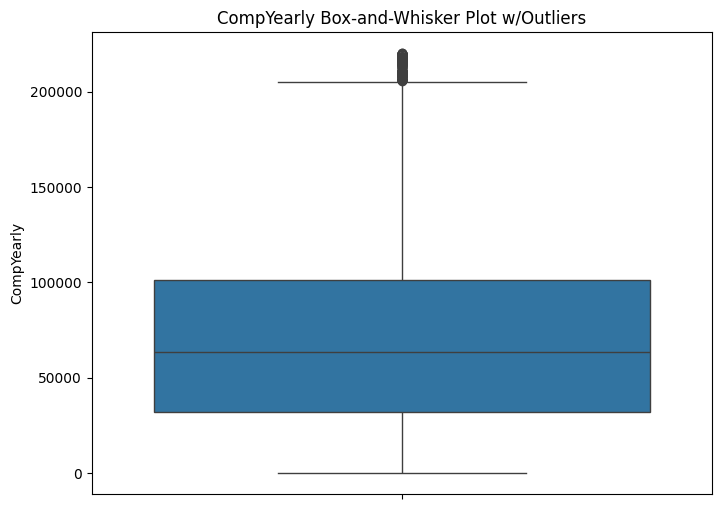

In [8]:
##Write your code here
df = df[df['ConvertedCompYearly'] >= 0]
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_without_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print(f"Original DataFrame size: {len(df)}")
print(f"DataFrame size after removing outliers: {len(df_without_outliers)}")

plt.figure(figsize=(8, 6))
sns.boxplot(y='ConvertedCompYearly', data=df_without_outliers)
plt.title('CompYearly Box-and-Whisker Plot w/Outliers')
plt.ylabel('CompYearly')

plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


                     ResponseId  CompTotal   WorkExp  JobSatPoints_1  \
ResponseId             1.000000   0.001336 -0.039272        0.014210   
CompTotal              0.001336   1.000000 -0.004885        0.025222   
WorkExp               -0.039272  -0.004885  1.000000       -0.028839   
JobSatPoints_1         0.014210   0.025222 -0.028839        1.000000   
JobSatPoints_4         0.001887   0.006603 -0.058504        0.425777   
JobSatPoints_5         0.007027   0.017022 -0.096626        0.629163   
JobSatPoints_6         0.007865   0.019909 -0.066387        0.609532   
JobSatPoints_7         0.019090   0.033172 -0.102817        0.592033   
JobSatPoints_8         0.005672   0.019578 -0.048650        0.614601   
JobSatPoints_9         0.020811   0.002968 -0.091732        0.589336   
JobSatPoints_10        0.012469   0.007573 -0.110805        0.579530   
JobSatPoints_11        0.011671   0.022402 -0.103907        0.607588   
ConvertedCompYearly   -0.008363   0.080457  0.154114        0.02

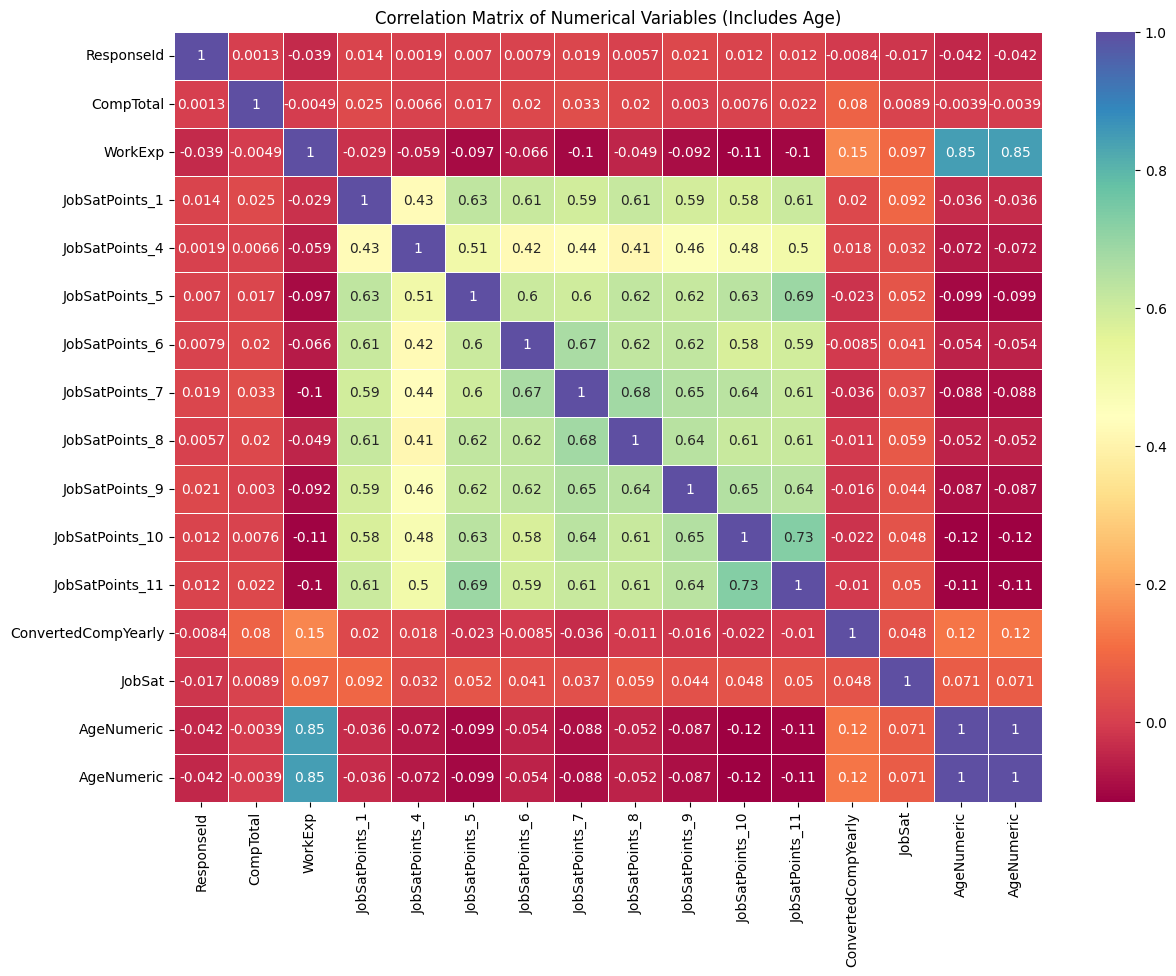

In [9]:
##Write your code here
age_list = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_list)

numerical = df.select_dtypes(include=['float64', 'int64']).columns
numerical = numerical.append(pd.Index(['AgeNumeric']))

correlation = df[numerical].corr()
print(correlation)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='Spectral', linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables (Includes Age)')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
